# Intuition
Consider the follwoing network,

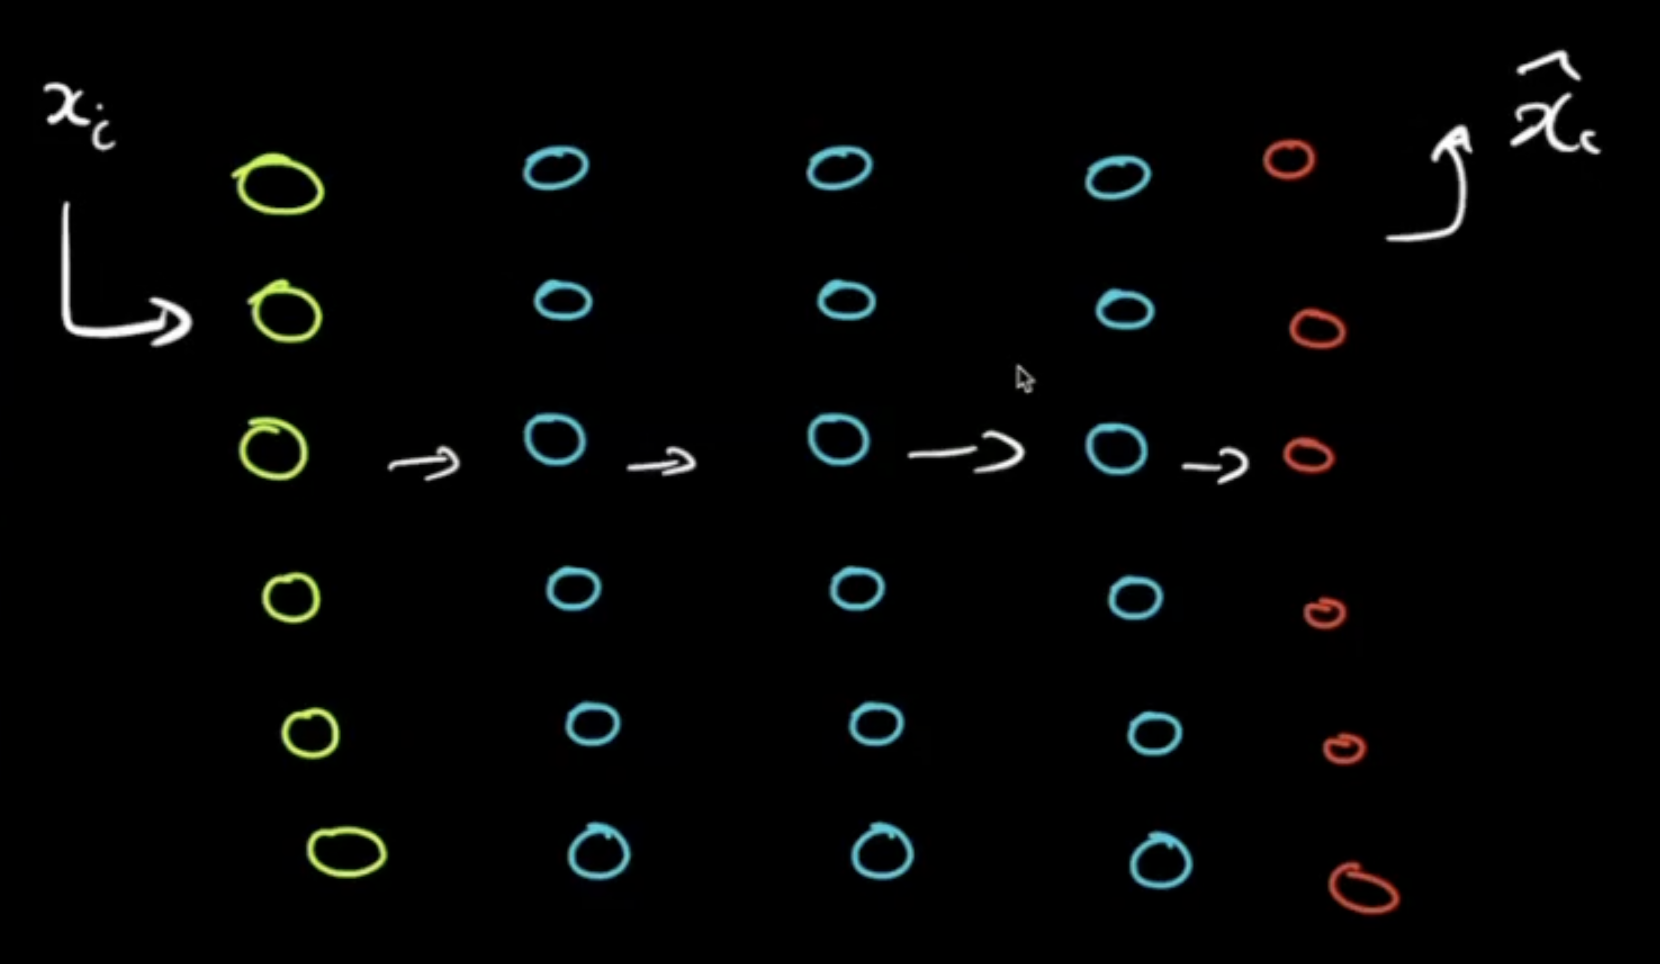

Notice that all the layers have the same umber of Neurons including the input and the output. The input to the Network is $x_i$ and the output is $\hat{x_i}$.

### Is it possible to feed $x_i$ to the Network and obtain $\hat{x_i}$ as output?
Yes, it is possible to achieve this by making all the activations as linear, i.e., whatever goes in, comes out and train the Neural Network to find the weights and biases.

Now, consider that a little complexity is introduced,

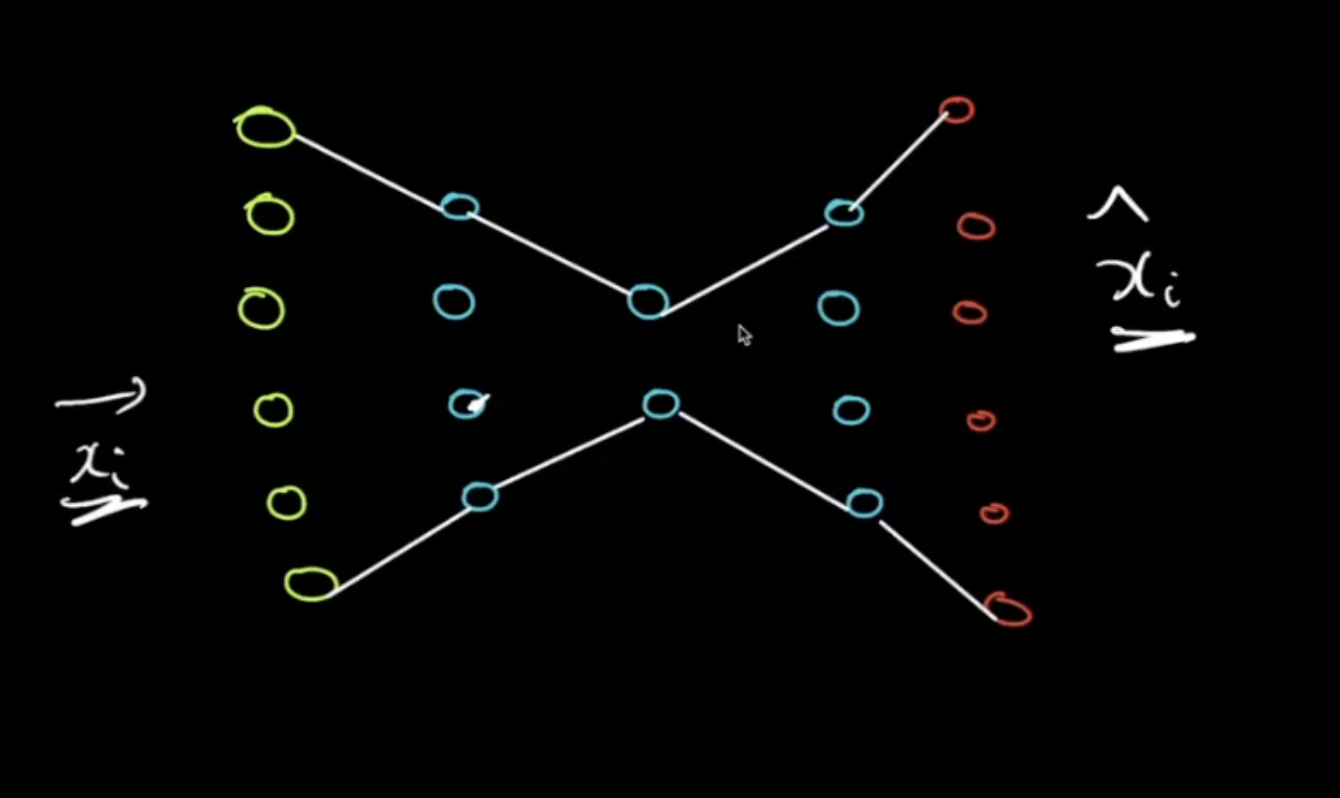

### Can input be made equal to the output ($x_i = \hat{x_i}$) for the Network in the above figure?
The task is possible. A predction can be made such that, $x_i ~ \hat{x_i}$.

A loss function can be decided on the problem,
- If the values are binary, `BinaryCrossentropy` can be used.
- For multi-class, `CategoricalCrossentropy` can be used.
- For continuous values, MSE or RMSE can be used.

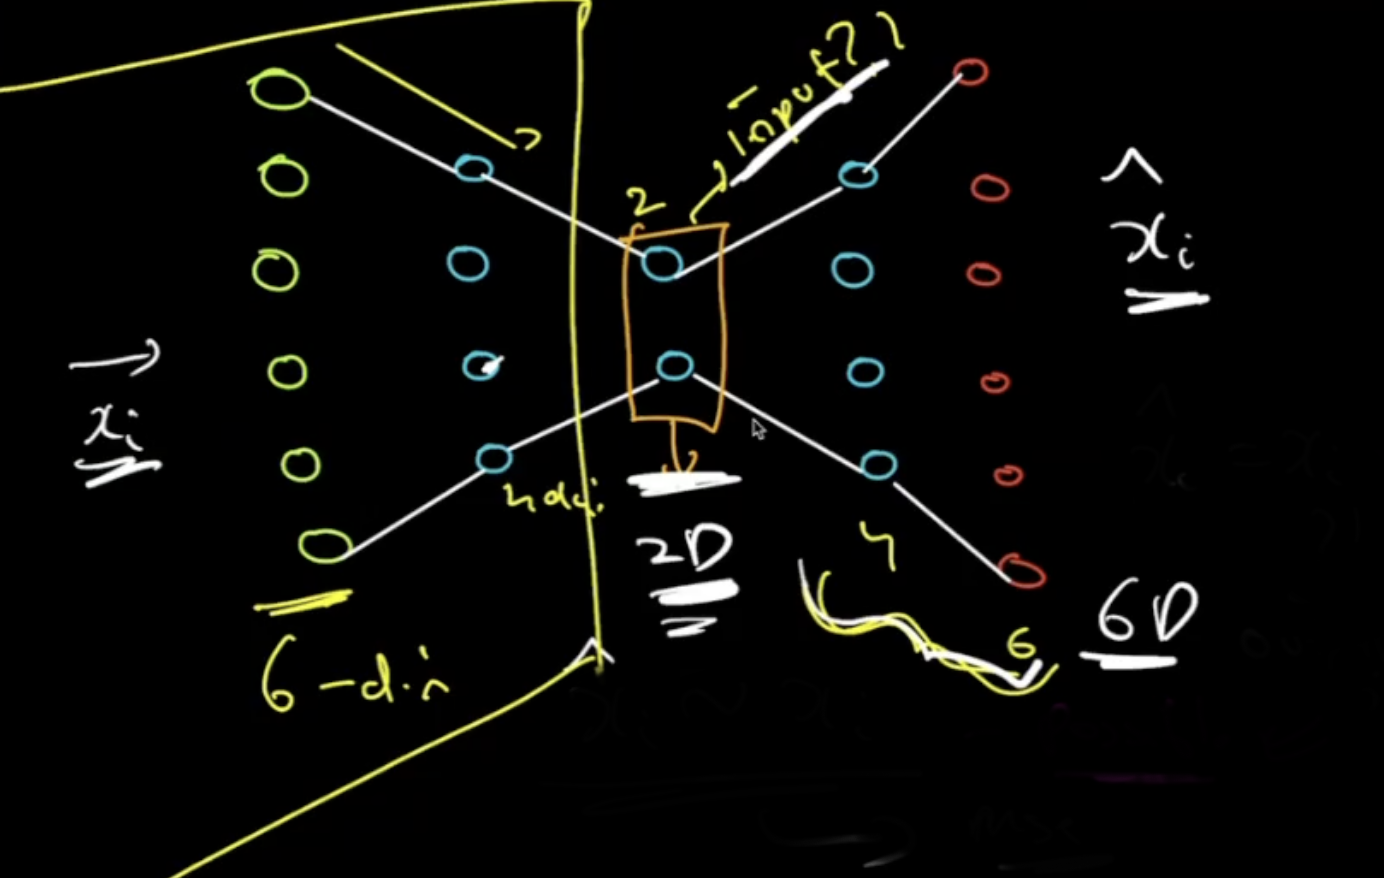

### What happened in the above Network?
The output from the input layer has 6 dimensions, this 6 dimensions were shrunk to 4 dimensions to be fed as input to the next layer. The 4 dimensions werare then shrunk to 2, to 4 and then back to 6 again.

Now consider the layer in the middle, i.e., layer with 2 Neuron and ignore the rest of the network before, it can be said that this middle layer is the input for the next layers. In other words, a 2D input gave 6D output.

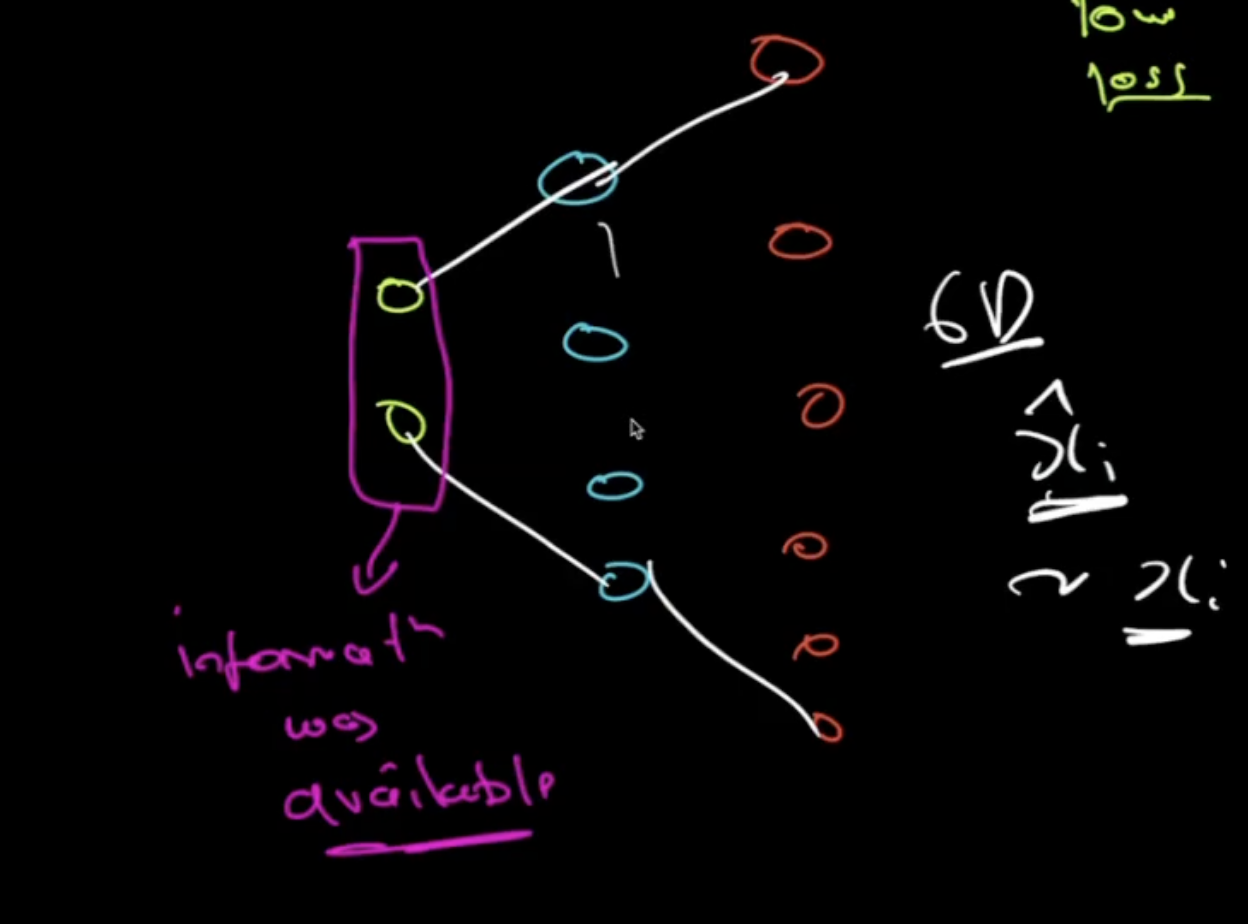

If it is possible to produce 6D output ($\hat{x_i}$) which is similar to $x_i$, it means all the information needed to produce this was available.

Now imagine that instead of 6D input vector, there is a sparse vector of 300D and using the Network it is being compressed down to 32Ds in the middle layer.

### Does this look like the data is being compressed?
Yes, essentially the dimensions of the input are being reduced.

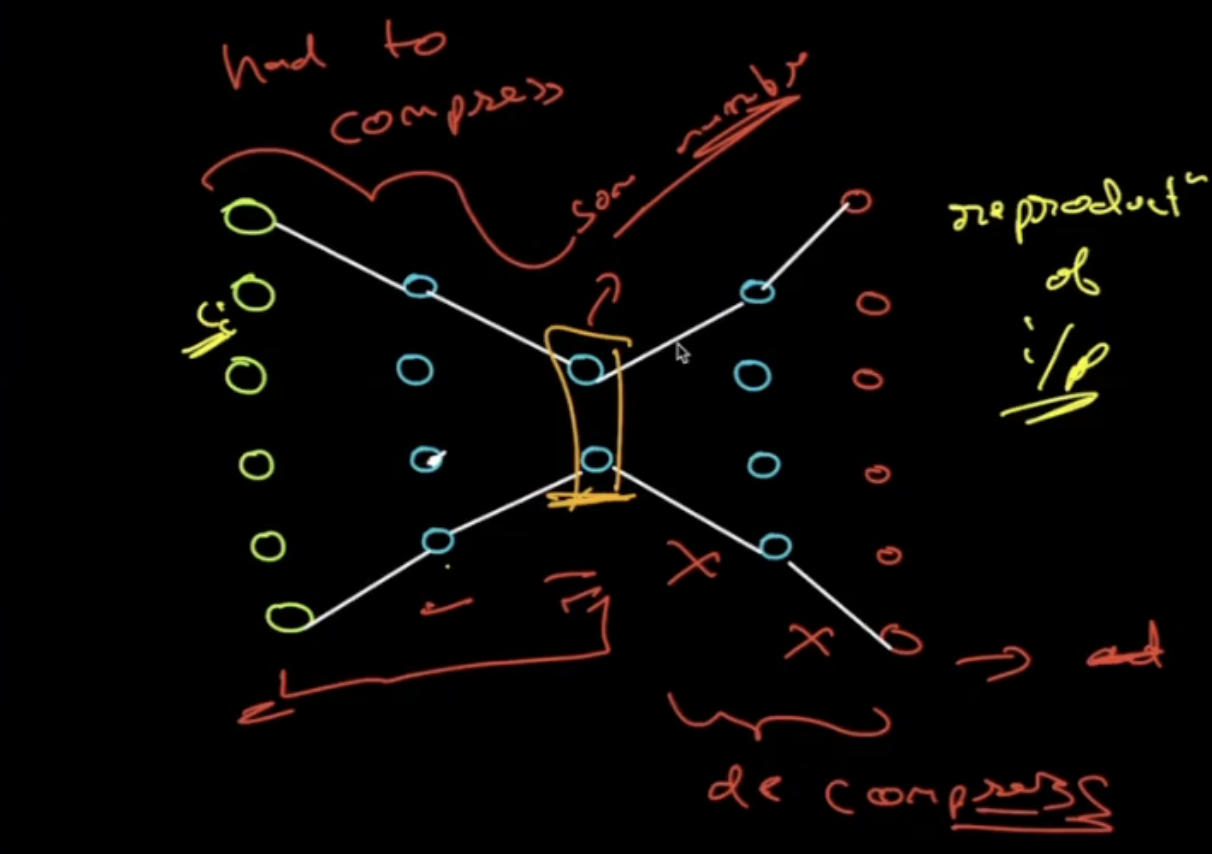

Therefore, in summary,
- The left part of the network is trying to compress the information, i.e., encoder.
- The right part of the network is decompressing it, i.e., decoder.

This has to happen such that, all the information would be stored in the middle layer. This means, the middle layer can be used as an embedding or encoding or latent features, i.e., the bottleneck can be used as features.

Such Networks are known as Autoencoders.

The purpose of the Network is to get the embedding.

# Applications
